**Weather Condition in world war 2**

# About Dataset

## Context  
While exploring the [Aerial Bombing Operations of World War Two dataset](https://www.kaggle.com/usaf/world-war-ii), and recalling that the D-Day landings were nearly postponed due to poor weather, I sought out weather reports from the period to compare with missions in the bombing operations dataset.

## Content  
The dataset contains information on weather conditions recorded on each day at various weather stations around the world.  
Information includes:  
- Precipitation  
- Snowfall  
- Temperatures (minimum and maximum)  
- Wind speed  
- Whether the day included thunderstorms or other poor weather conditions  

## Acknowledgements  
The data are taken from the **United States National Oceanic and Atmospheric Administration (NOAA)** – [National Centres for Environmental Information](https://www.kaggle.com/noaa).  
Original source: [NOAA WWII-era land-based station data](https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/world-war-ii-era-data).


**Is there a relationship between the daily minimum and maximum temperature? Can you predict the maximum temperature given the minimum temperature?**

In [50]:
# importing necessary libries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [12]:
df =pd.read_csv(r"C:\Users\lamin\OneDrive\Desktop\Datafolder\regression data\warw2\Summary of Weather.csv")

C:\Users\lamin\AppData\Local\Temp\ipykernel_17992\1003565676.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv(r"C:\Users\lamin\OneDrive\Desktop\Datafolder\regression data\warw2\Summary of Weather.csv")


In [52]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0.0,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0.0,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0.0,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0.0,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0


## Exploratory Analysis

In [53]:
print(df.isnull().sum()) # checking for null values

STA              0
Date             0
Precip           0
MaxTemp          0
MinTemp          0
MeanTemp         0
Snowfall      1163
YR               0
MO               0
DA               0
PRCP          1932
DR          118507
SPD         118508
MAX            474
MIN            468
MEA            498
SNF           1163
dtype: int64


#### The data have clean and drop most of unnecessery columns

In [32]:
df.to_csv(r"C:\Users\lamin\OneDrive\Desktop\Datafolder\clean_WW2.csv", index=False)

In [33]:
df

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0.0,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0.0,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0.0,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0.0,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,28.333333,18.333333,23.333333,0.0,45,12,27,0,NaN,NaN,83.0,65.0,74.0,0.0
119036,82506,1945-12-28,9.906,29.444444,18.333333,23.888889,0.0,45,12,28,0.39,NaN,NaN,85.0,65.0,75.0,0.0
119037,82506,1945-12-29,0,28.333333,18.333333,23.333333,0.0,45,12,29,0,NaN,NaN,83.0,65.0,74.0,0.0
119038,82506,1945-12-30,0,28.333333,18.333333,23.333333,0.0,45,12,30,0,NaN,NaN,83.0,65.0,74.0,0.0


In [56]:
df.shape

(119040, 17)

## Statistical Description

In [57]:
df.describe()

,STA,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000
mean,29659.435795,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843
std,20953.209402,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082
min,10001.000000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000
25%,11801.000000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000
50%,22508.000000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000
75%,33501.000000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000
max,82506.000000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000


In [58]:
print("Variance:\n", df.var(numeric_only=True))
print("Skewness:\n", df.skew(numeric_only=True))
print("Kurtosis:\n", df.kurt(numeric_only=True))

Variance:
 STA         4.390370e+08
MaxTemp     7.600033e+01
MinTemp     6.946509e+01
MeanTemp    6.885651e+01
YR          1.292128e+00
MO          1.173447e+01
DA          7.734395e+01
DR          2.317011e+02
SPD         3.091773e+01
MAX         2.210979e+02
MIN         2.097138e+02
MEA         2.019548e+02
dtype: float64
Skewness:
 STA         1.288166
MaxTemp    -2.080644
MinTemp    -1.889984
MeanTemp   -2.158658
YR         -0.965982
MO         -0.074214
DA         -0.002949
DR          0.348552
SPD         0.874037
MAX        -1.881670
MIN        -1.820894
MEA        -2.026856
dtype: float64
Kurtosis:
 STA         0.868481
MaxTemp     6.330238
MinTemp     4.517975
MeanTemp    6.051904
YR          0.763176
MO         -1.185754
DA         -1.191827
DR         -0.477728
SPD         0.690885
MAX         5.314212
MIN         4.310761
MEA         5.442179
dtype: float64


## Visualization of the selected variables for the model

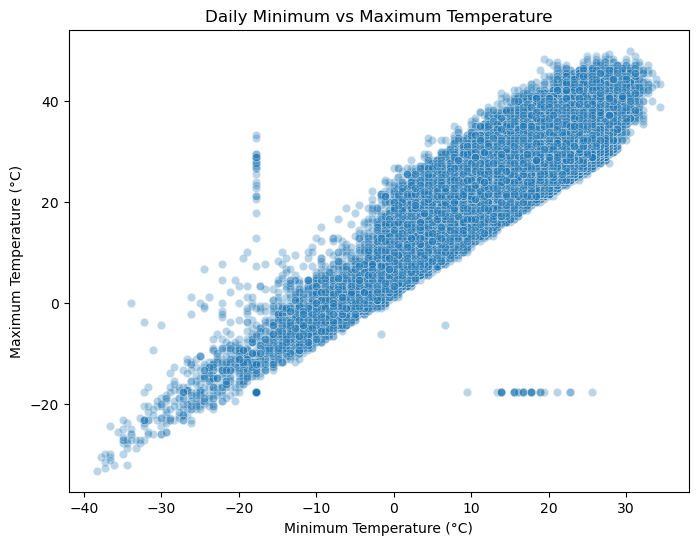

In [36]:
# 3. Scatter plot to visualize relationship
plt.figure(figsize=(8,6))
sns.scatterplot(x='MinTemp', y='MaxTemp', data=df, alpha=0.3)
plt.title("Daily Minimum vs Maximum Temperature")
plt.xlabel("Minimum Temperature (°C)")
plt.ylabel("Maximum Temperature (°C)")
plt.show()

In [38]:
# 4. Correlation
correlation = df['MinTemp'].corr(df['MaxTemp'])
print(f"Correlation between Min and Max Temperature: {correlation:.2f}")

Correlation between Min and Max Temperature: 0.88


## Building the model

In [42]:
X = df[['MinTemp']]
y = df['MaxTemp']
model= LinearRegression()
model.fit(X,y)

LinearRegression()

In [43]:
model.score(X,y)

0.7715582862315506

In [46]:
# Predictions
y_pred = model.predict(X)
y_pred

array([31.11777216, 30.60734204, 31.11777216, ..., 27.54476126,
       27.54476126, 26.52390101])

In [47]:
# Model coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")

Intercept: 10.70
Slope: 0.92


## Model Evaluation

In [48]:
# 6. Evaluate model
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.772
RMSE: 4.17


C:\Users\lamin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lamin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


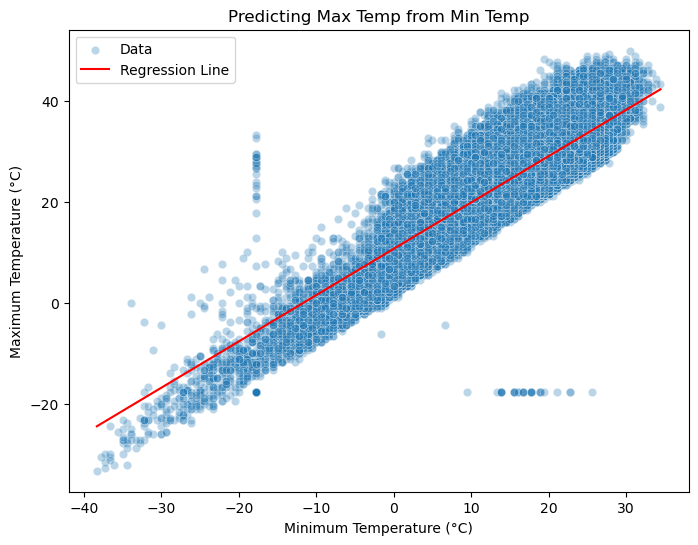

In [49]:
# 7. Plot regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x='MinTemp', y='MaxTemp', data=df, alpha=0.3, label="Data")
sns.lineplot(x=df['MinTemp'], y=y_pred, color='red', label="Regression Line")
plt.title("Predicting Max Temp from Min Temp")
plt.xlabel("Minimum Temperature (°C)")
plt.ylabel("Maximum Temperature (°C)")
plt.legend()
plt.show()

# Regression Analysis: Predicting Maximum Temperature from Minimum Temperature

We explored the relationship between daily **minimum temperature (`MinTemp`)** and **maximum temperature (`MaxTemp`)**. Using simple linear regression, we obtained the following results:

- **R² (Coefficient of Determination): 0.772**  
  This means that approximately **77% of the variation in `MaxTemp`** can be explained by `MinTemp`. The remaining 23% is influenced by other factors such as cloud cover, wind, or precipitation.

- **RMSE (Root Mean Squared Error): 4.17**  
  On average, the model's predictions of `MaxTemp` differ from the actual values by about **±4.17 degrees**. This indicates reasonable predictive accuracy, though some days may deviate more due to unusual weather conditions.

**Interpretation:**  
`MinTemp` is a strong predictor of `MaxTemp`, but the error suggests that other weather variables also play a role in determining daily maximum temperatures.


# General Conclusion

The linear regression model shows a **strong positive relationship** between daily minimum temperature (`MinTemp`) and maximum temperature (`MaxTemp`). With an R² of 0.772, the model explains a significant portion of the variability in `MaxTemp`, indicating that warmer nights tend to be followed by warmer days.  

The RMSE of 4.17 suggests that while predictions are generally accurate, there is still some variability not captured by the model, likely due to other weather factors such as cloud cover, wind, and precipitation.  

Overall, `MinTemp` is a useful predictor for estimating daily maximum temperatures, but additional variables would improve prediction accuracy for extreme or unusual weather conditions.
